In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# download the csv file at https://www.kaggle.com/jsaguiar/exploratory-analysis-with-seaborn/data
df = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0).astype('float32')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float32
Churn               7043 non-null object
dtypes: float32(1), float64(1), 

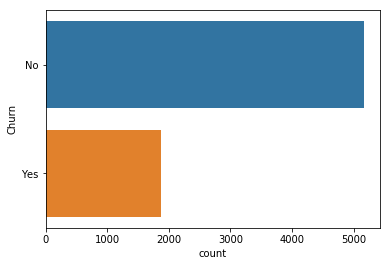

In [6]:
sns.countplot(y='Churn', data=df)

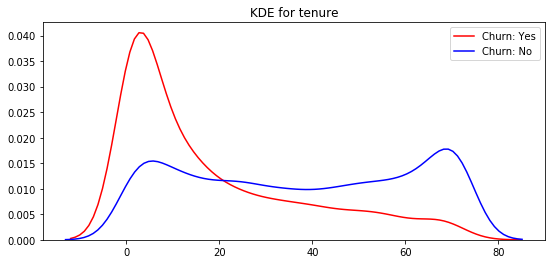

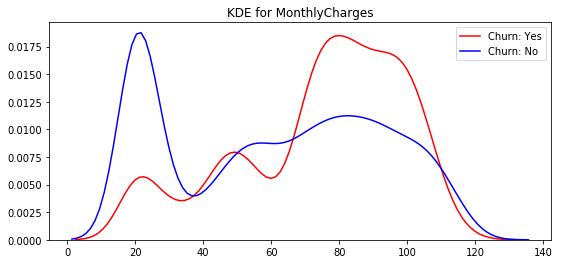

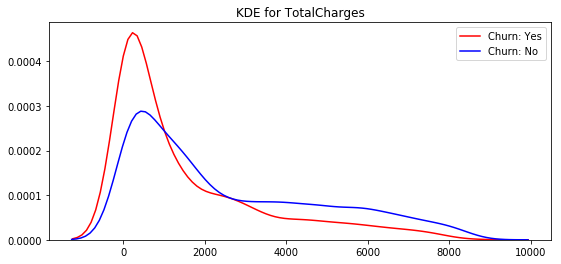

In [9]:
def plot_kde(column):
    plt.figure(figsize=(9, 4))
    plt.title(f"KDE for {column}")
    sns.kdeplot(df[df.Churn=='Yes'][column], label='Churn: Yes', color='r')
    sns.kdeplot(df[df.Churn=='No'][column], label='Churn: No', color='b')
    
plot_kde('tenure') # lower tenure means more likely to churn
plot_kde('MonthlyCharges') # more monthly charge means more likely to churn
plot_kde('TotalCharges')

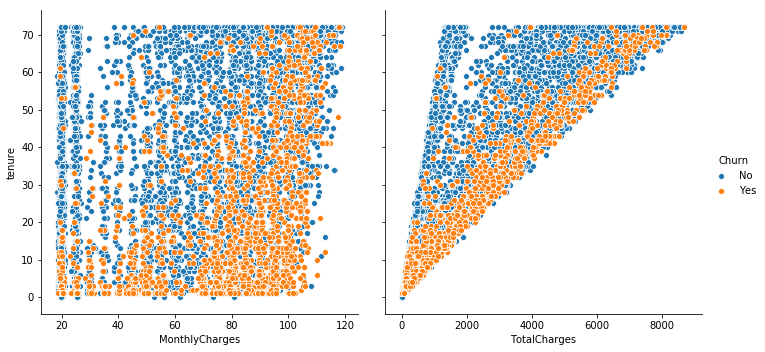

In [22]:
sns.pairplot(x_vars=['MonthlyCharges', 'TotalCharges'], y_vars=['tenure'], data=df, hue='Churn', height=5)

## Gender and Age (Senior Citizen)

In [56]:
df['gender'].describe()

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object

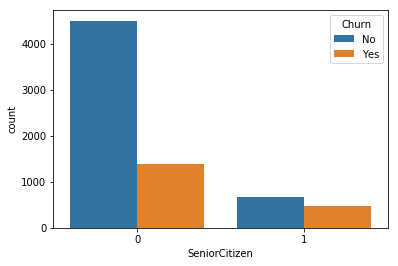

In [24]:
sns.countplot(x='SeniorCitizen', data=df, hue='Churn') # not a senior citizen is more likely to churn

In [171]:
SENIOR_CITIZEN = 'SeniorCitizen'
GENDER = 'gender'
CHURN = 'Churn'
PARTNER = 'Partner'
DEPENDENTS = 'Dependents'
PhoneService = 'PhoneService'
MultipleLines = 'MultipleLines'
MonthlyCharges = 'MonthlyCharges'
InternetService = 'InternetService'
PaymentMethod = 'PaymentMethod'
Contract = 'Contract'

   SeniorCitizen Churn  percentage of customer
0              0    No                0.640068
1              0   Yes                0.197785
2              1    No                0.094562
3              1   Yes                0.067585


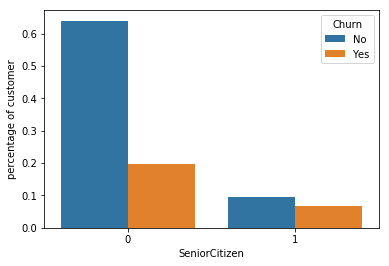

In [52]:
axis_name = 'percentage of customer'
g = df.groupby('SeniorCitizen')["Churn"].value_counts().to_frame()
g = g.rename({'Churn': axis_name}, axis=1).reset_index()
g[axis_name] /= len(df)
print(g)
sns.barplot(x=SENIOR_CITIZEN, y=axis_name, data=g, hue='Churn')
# g[axis_name] /= len(df)
# sns.barplot(x='SeniorCitizen', y=axis_name, data=g, hue='Churn')

/Users/kdang/.virtualenvs/torch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


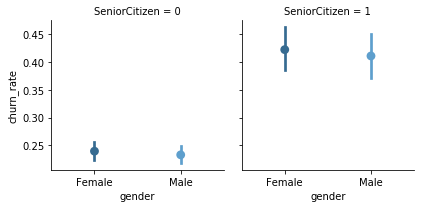

In [119]:
axis_name = 'churn_rate'
df[axis_name] = df[CHURN].replace("No", 0).replace("Yes", 1)
fg = sns.FacetGrid(df, col=SENIOR_CITIZEN)
fg.map(sns.pointplot, GENDER, axis_name, palette = "Blues_d", order= ['Female', 'Male']) # => senior citizen is more likely to churn

In [120]:
print('senior citizen male churn rate', len(df.query(f'{SENIOR_CITIZEN}==1 & {CHURN}=="Yes" & {GENDER}=="Male"'))/len(df))
print('senior citizen female churn rate', len(df.query(f'{SENIOR_CITIZEN}==1 & {CHURN}=="Yes" & {GENDER}=="Female"'))/len(df))
print('non-senior citizen male churn rate', len(df.query(f'{SENIOR_CITIZEN}==0 & {CHURN}=="Yes" & {GENDER}=="Male"'))/len(df))
print('non-senior citizen female churn rate', len(df.query(f'{SENIOR_CITIZEN}==0 & {CHURN}=="Yes" & {GENDER}=="Female"'))/len(df))

senior citizen male churn rate 0.033508448104500925
senior citizen female churn rate 0.034076387902882296
non-senior citizen male churn rate 0.09853755501916797
non-senior citizen female churn rate 0.09924747976714468


## Customer without a partner or dependent are more likely to churn

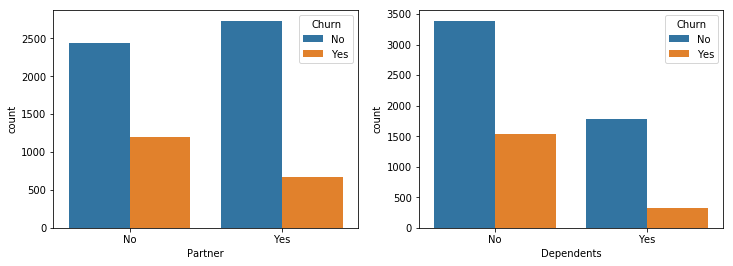

In [132]:
fig, axis = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=PARTNER, data=df, hue=CHURN, order=['No', 'Yes']) 
plt.subplot(1, 2, 2)
sns.countplot(x=DEPENDENTS, data=df, hue=CHURN, order=['No', 'Yes'])

## Phone services

In [141]:
df.groupby([PhoneService])[CHURN].value_counts()

PhoneService  Churn
No            No        512
              Yes       170
Yes           No       4662
              Yes      1699
Name: Churn, dtype: int64

In [142]:
df.groupby([MultipleLines])[CHURN].value_counts()

MultipleLines     Churn
No                No       2541
                  Yes       849
No phone service  No        512
                  Yes       170
Yes               No       2121
                  Yes       850
Name: Churn, dtype: int64

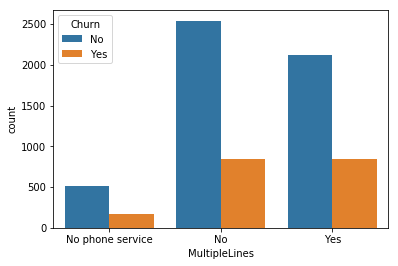

In [143]:
sns.countplot(x=MultipleLines, data=df, hue=CHURN)

### => Customer with phone service is more likely to churn

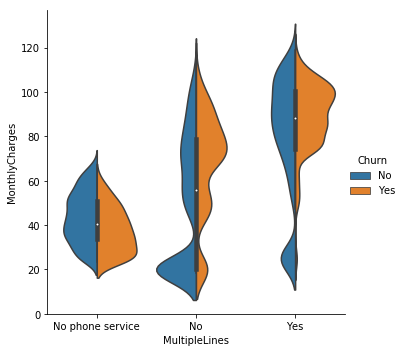

In [149]:
sns.catplot(x=MultipleLines, y=MonthlyCharges, data=df, hue=CHURN, kind='violin', split=True)

## Internet service

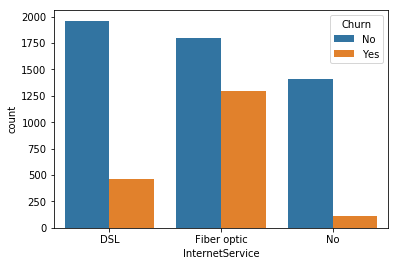

In [152]:
sns.countplot(x=InternetService, data=df, hue=CHURN)

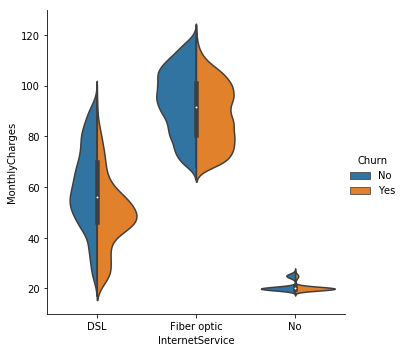

In [159]:
sns.catplot(x=InternetService, y=MonthlyCharges, data=df, hue=CHURN, kind='violin', split=True)

### => Customer with DSL connection with Higher charges are less probable to churn?

## Internet additional services

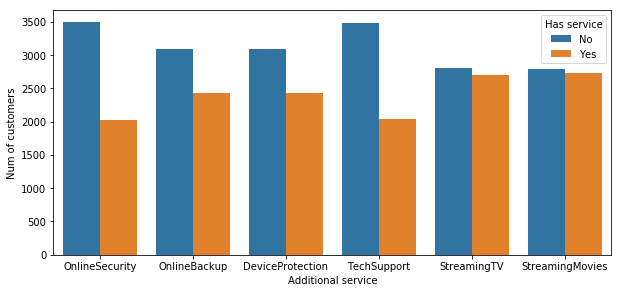

In [161]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

## Payment methods

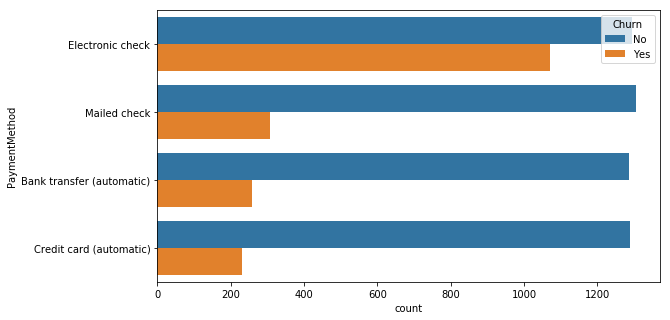

In [169]:
plt.figure(figsize=(9, 5))
sns.countplot(y=PaymentMethod, data=df, hue=CHURN)

### => electronic check is highly likely to churn

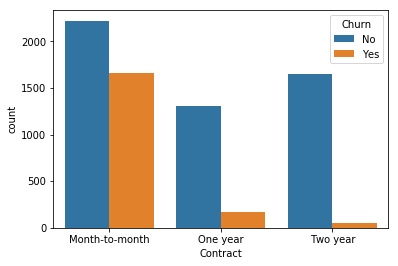

In [172]:
sns.countplot(x=Contract, data=df, hue=CHURN)

### => shorter contract is highly likely to churn compare to longer durations

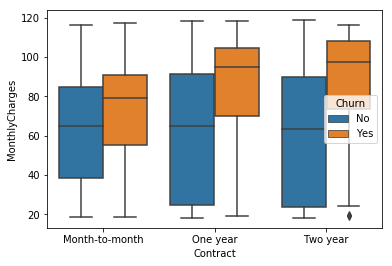

In [174]:
sns.boxplot(x=Contract, y='MonthlyCharges', data=df, hue='Churn')

### => people who churned has higher monthly charges

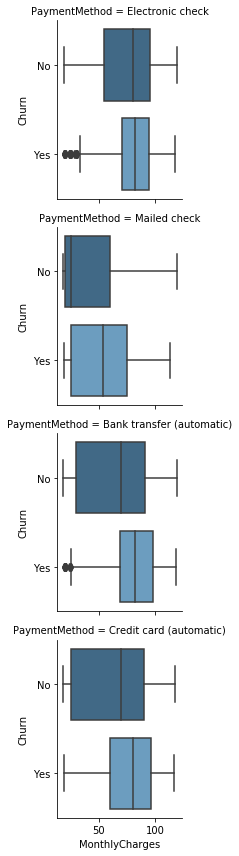

In [187]:
g = sns.FacetGrid(df, row=PaymentMethod)
g.map(sns.boxplot, MonthlyCharges, CHURN, palette = "Blues_d")

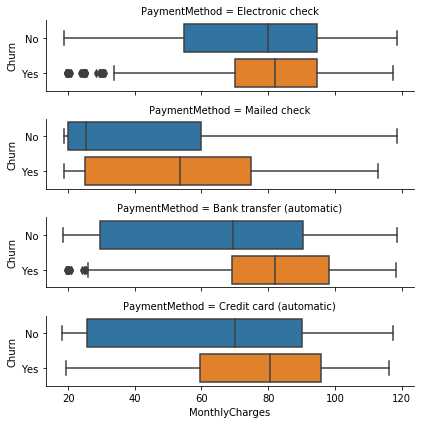

In [189]:
sns.catplot(x=MonthlyCharges, y=CHURN, data=df, row=PaymentMethod, kind='box', height=1.5, aspect=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)
# Drop redundant columns (for features with two unique values)
drop = ['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No',
        'Dependents_No', 'PhoneService_No', 'PaperlessBilling_No']
x, y = df.drop(drop,axis=1), df['Churn_Yes']
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')